# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to get the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in list to get weather data
for i, city in enumerate(cities[0:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(city_url).json()
        
        # Set response
        response = requests.get(city_url)
        
        # Status code
        status_code = response.status_code
        
        # Status code response
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Get city data
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Pressure": city_pressure,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # sleep for 1 second
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | yermakovskoye
Processing Record 5 of Set 1 | walvis bay
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | rouyn-noranda
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | ambon
Processing Record 15 of Set 1 | flying fish cove
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | vadso
Processing Record 20 of Set 1 | rovira
Processing Record 21 of Set 1 | abaza
Processing Record 22 of Set 1 | miyazu

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count to see whether there are any null values
city_data_df.count()

City          50
Lat           50
Lng           50
Max Temp      50
Humidity      50
Pressure      50
Cloudiness    50
Wind Speed    50
Country       50
Date          50
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,81.91,74,1018,75,8.05,US,1718585090
1,blackmans bay,-43.0167,147.3167,49.73,78,1021,100,1.99,AU,1718585495
2,kavaratti,10.5669,72.6420,82.54,79,1008,100,8.39,IN,1718585496
3,yermakovskoye,53.2831,92.4003,62.62,79,1007,13,2.59,RU,1718585497
4,walvis bay,-22.9575,14.5053,62.10,82,1017,98,9.22,NA,1718585498


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities_ben.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities_ben.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,81.91,74,1018,75,8.05,US,1718585090
1,blackmans bay,-43.0167,147.3167,49.73,78,1021,100,1.99,AU,1718585495
2,kavaratti,10.5669,72.6420,82.54,79,1008,100,8.39,IN,1718585496
3,yermakovskoye,53.2831,92.4003,62.62,79,1007,13,2.59,RU,1718585497
4,walvis bay,-22.9575,14.5053,62.10,82,1017,98,9.22,NaN,1718585498


In [8]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        50 non-null     object 
 1   Lat         50 non-null     float64
 2   Lng         50 non-null     float64
 3   Max Temp    50 non-null     float64
 4   Humidity    50 non-null     int64  
 5   Pressure    50 non-null     int64  
 6   Cloudiness  50 non-null     int64  
 7   Wind Speed  50 non-null     float64
 8   Country     49 non-null     object 
 9   Date        50 non-null     int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 4.3+ KB


In [9]:
# Drop any null rows
df = city_data_df.dropna(how="any").reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     49 non-null     int64  
 1   City        49 non-null     object 
 2   Lat         49 non-null     float64
 3   Lng         49 non-null     float64
 4   Max Temp    49 non-null     float64
 5   Humidity    49 non-null     int64  
 6   Pressure    49 non-null     int64  
 7   Cloudiness  49 non-null     int64  
 8   Wind Speed  49 non-null     float64
 9   Country     49 non-null     object 
 10  Date        49 non-null     int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 4.3+ KB


In [10]:
df = city_data_df
df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,81.91,74,1018,75,8.05,US,1718585090
1,blackmans bay,-43.0167,147.3167,49.73,78,1021,100,1.99,AU,1718585495
2,kavaratti,10.5669,72.6420,82.54,79,1008,100,8.39,IN,1718585496
3,yermakovskoye,53.2831,92.4003,62.62,79,1007,13,2.59,RU,1718585497
4,walvis bay,-22.9575,14.5053,62.10,82,1017,98,9.22,NaN,1718585498


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

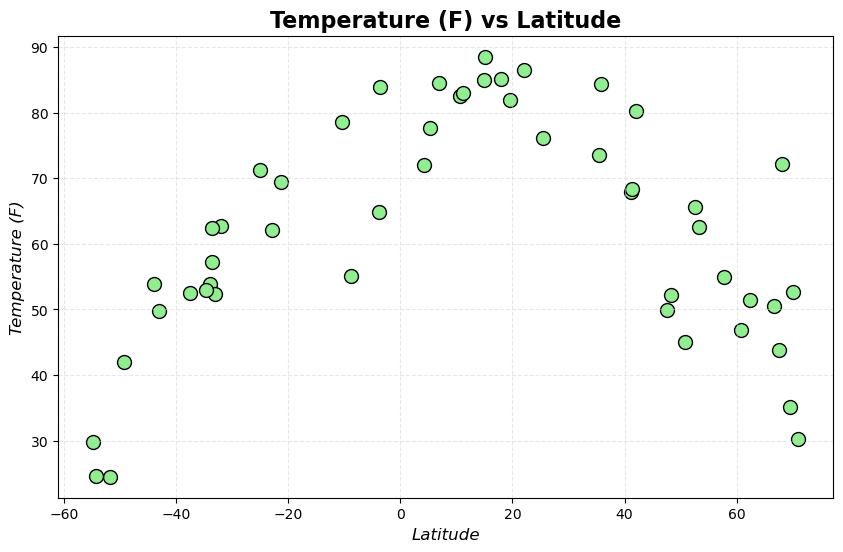

In [11]:
# Build scatter plot for latitude vs. temperature

# Define data
x = df.Lat
y = df['Max Temp']

# Canvas size
plt.figure(figsize=(10, 6))

# Plot
plt.scatter(x, y, facecolor="lightgreen", edgecolor="black", s=100)

# Labels and format
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Temperature (F) vs Latitude", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("./output_data/Fig1_ben.png")
plt.show()

#### Latitude Vs. Humidity

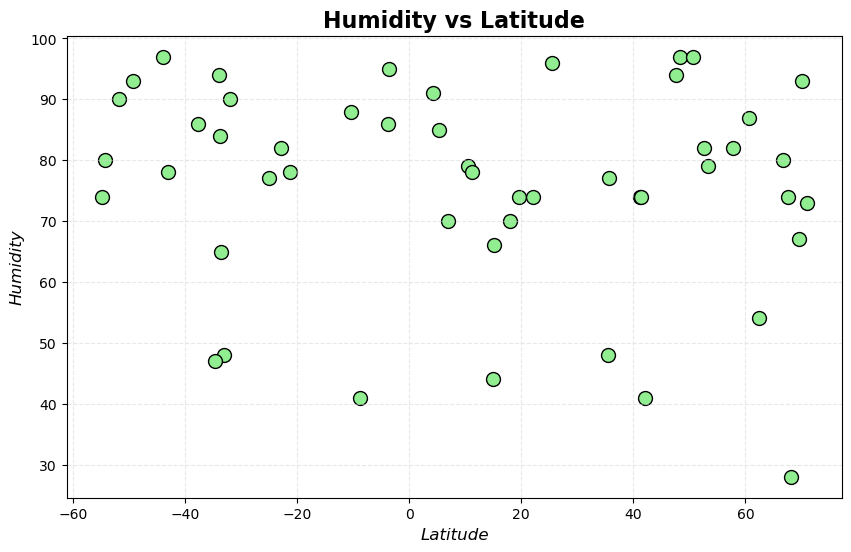

In [12]:
# Build the scatter plots for latitude vs. humidity

# Define data
x = df.Lat
y = df.Humidity

# Canvas size
plt.figure(figsize=(10, 6))

# Plot
plt.scatter(x, y, facecolor="lightgreen", edgecolor="black", s=100)

# Labels and format
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Humidity vs Latitude", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("./output_data/Fig2_ben.png")
plt.show()

#### Latitude Vs. Cloudiness

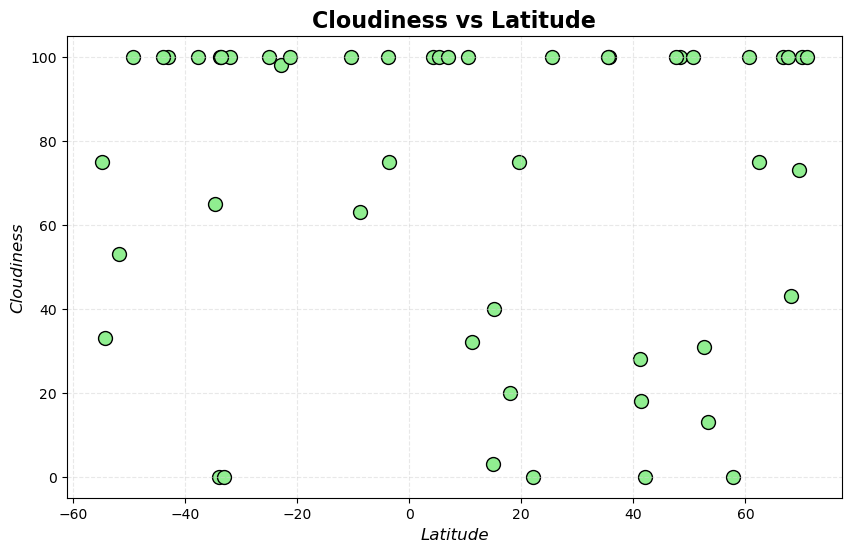

In [13]:
# Build the scatter plots for latitude vs. cloudiness

# Define data
x = df.Lat
y = df.Cloudiness

# Canvas size
plt.figure(figsize=(10, 6))

# Plot
plt.scatter(x, y, facecolor="lightgreen", edgecolor="black", s=100)

# Labels and format
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Cloudiness vs Latitude", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("./output_data/Fig3_ben.png")
plt.show()

#### Latitude vs. Wind Speed Plot

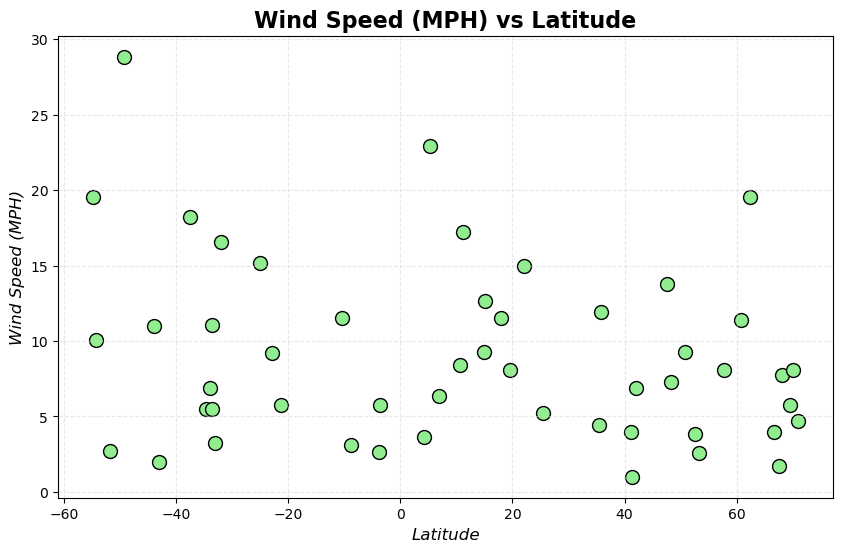

In [14]:
# Build the scatter plots for latitude vs. wind speed

# Define data
x = df.Lat
y = df["Wind Speed"]

# Canvas size
plt.figure(figsize=(10, 6))

# Plot
plt.scatter(x, y, facecolor="lightgreen", edgecolor="black", s=100)

# Labels and format
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (MPH)", fontsize=12, fontstyle="italic")
plt.title("Wind Speed (MPH) vs Latitude", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("./output_data/Fig4_ben.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    
    # Line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Canvas size
    plt.figure(figsize=(10, 6))
    
    # Plot
    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-")
    
    # Labels and format
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,81.91,74,1018,75,8.05,US,1718585090
2,kavaratti,10.5669,72.6420,82.54,79,1008,100,8.39,IN,1718585496
3,yermakovskoye,53.2831,92.4003,62.62,79,1007,13,2.59,RU,1718585497
6,wailua homesteads,22.0669,-159.3780,86.43,74,1018,0,14.97,US,1718585500
8,hasaki,35.7333,140.8333,84.29,77,1008,100,11.92,JP,1718585502


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,49.73,78,1021,100,1.99,AU,1718585495
4,walvis bay,-22.9575,14.5053,62.10,82,1017,98,9.22,NaN,1718585498
5,saint-pierre,-21.3393,55.4781,69.48,78,1017,100,5.75,RE,1718585499
7,lebu,-37.6167,-73.6500,52.43,86,1016,100,18.23,CL,1718585086
10,port elizabeth,-33.9180,25.5701,53.89,94,1016,0,6.91,ZA,1718585068


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6863692227775706


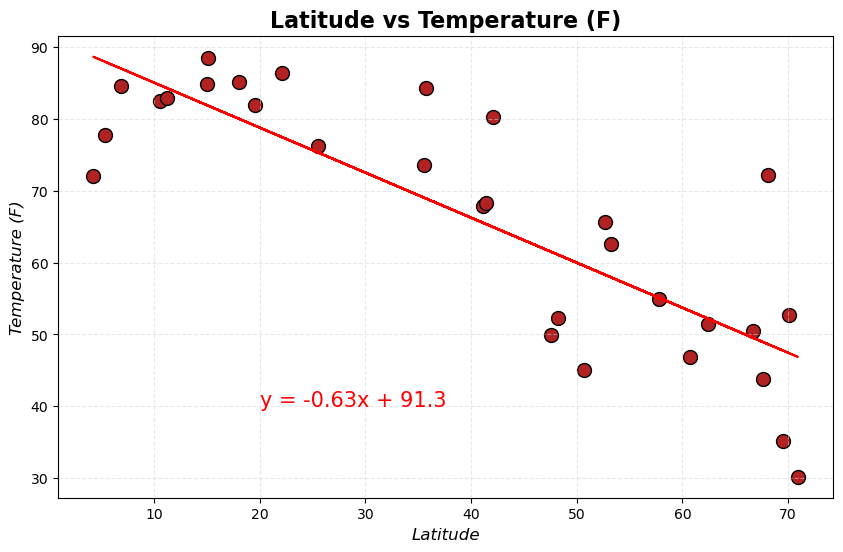

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature (F)", (20,40))

The r-squared is: 0.7141872677436188


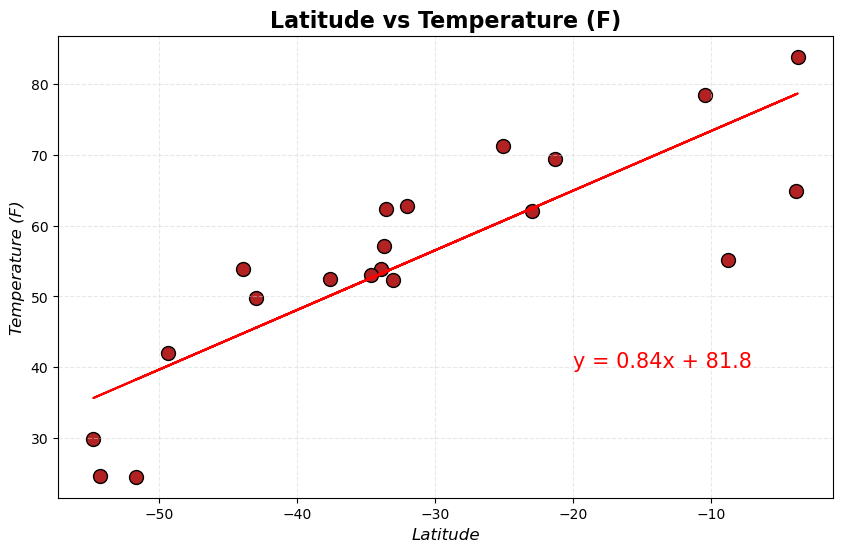

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature (F)", (-20,40))

**Discussion about the linear relationship:** As expected, in the northern hemisphere, as latitude increases (the further north one is), temperature decreases, and in the southern hemisphere, starting near the south pole, as latitude increases, temperature increases. The data shows a good correlation with respective r-squared values of 0.68 and 0.71.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0015772207345159306


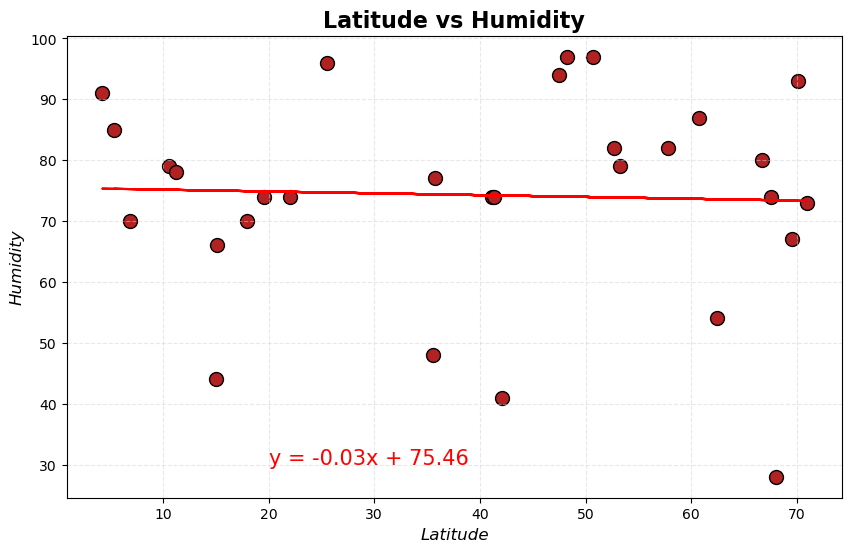

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (20,30))

The r-squared is: 0.011918675710370773


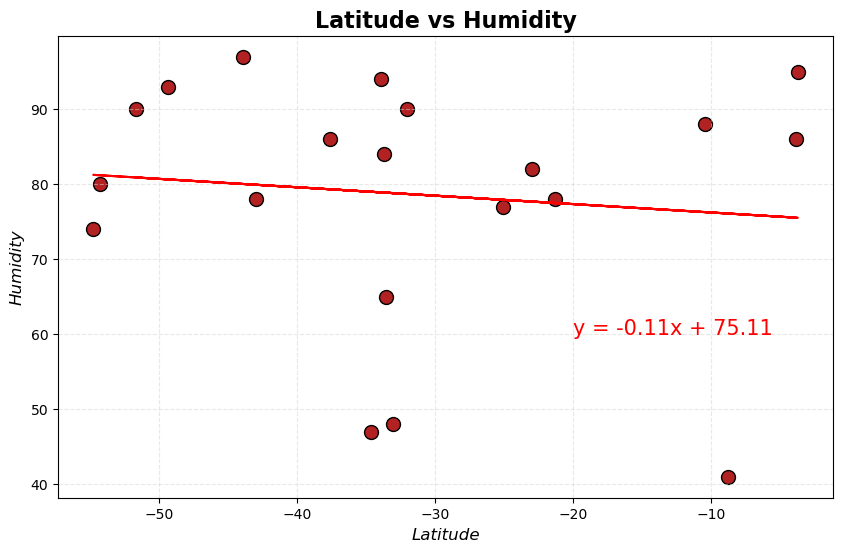

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (-20,60))

**Discussion about the linear relationship:** There is a very weak, almost null correlation, of humidity and latitude for both northern and southern hemispheres. Changes to humidity are not dependent on latitude with this dataset.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.009891179721081566


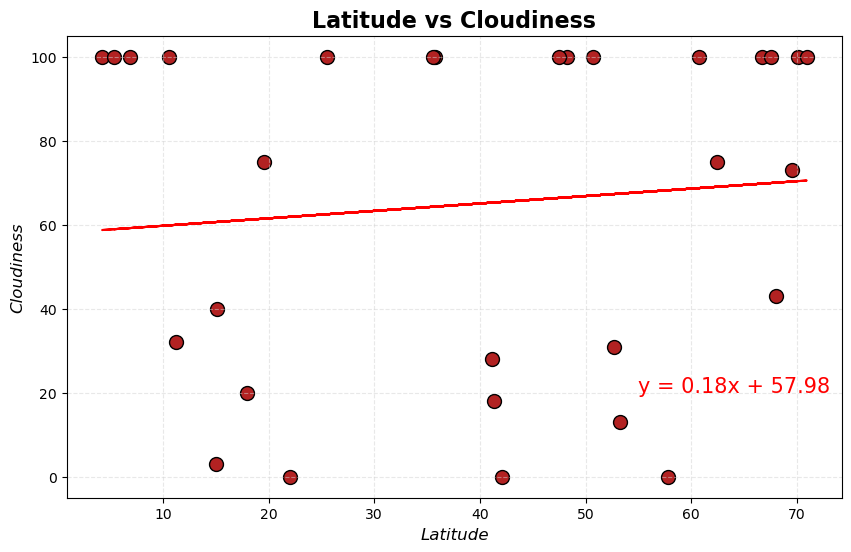

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (55,20))

The r-squared is: 0.038330594978826085


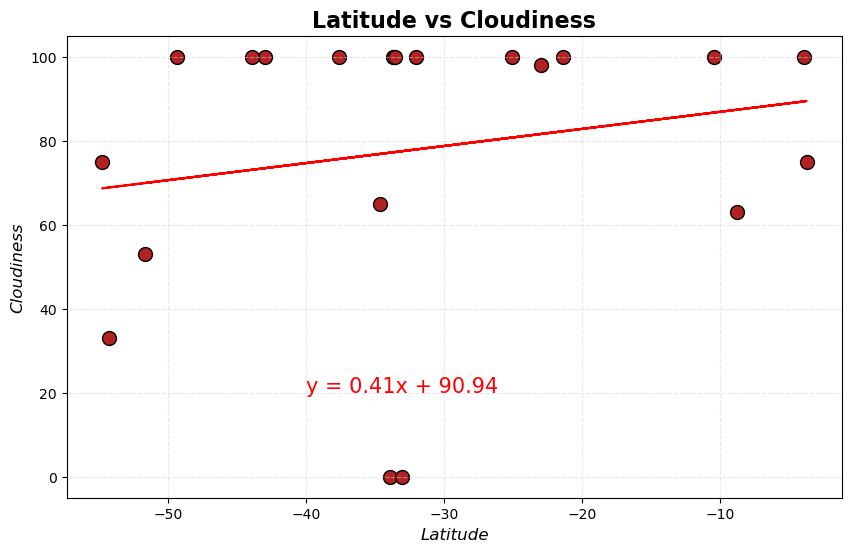

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (-40,20))

**Discussion about the linear relationship:** No correlation seems to exist between latitude and cloudiness as one moves from the the equator to the north pole, and the south pole to the equator. The r-squared is 0 and 0.038.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.10251005448373521


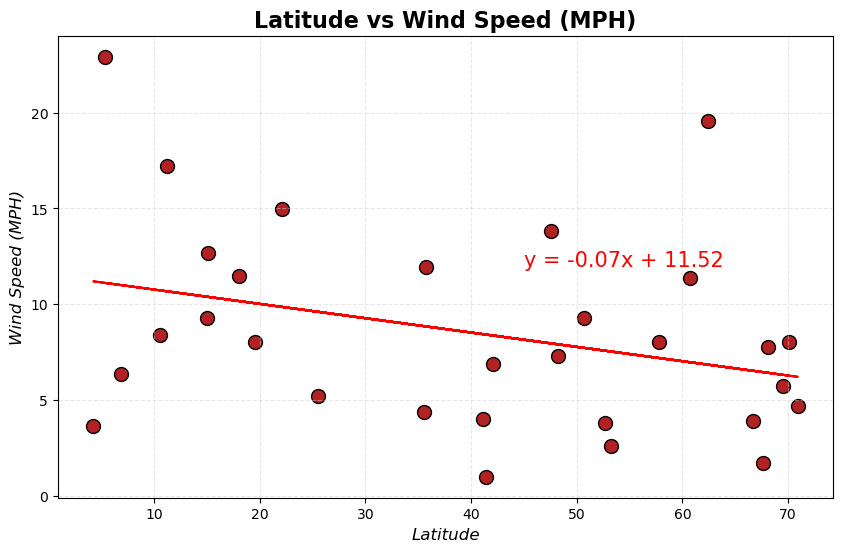

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed (MPH)", (45,12))

The r-squared is: 0.14429919749980064


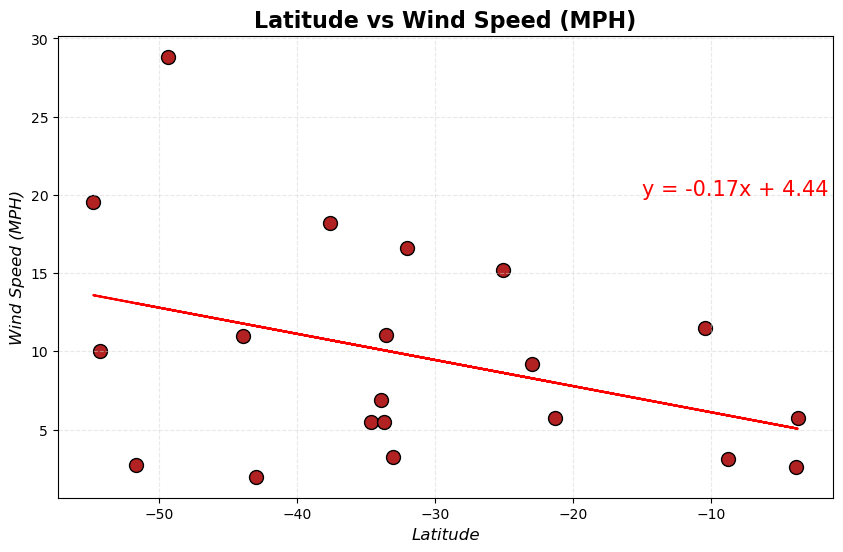

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed (MPH)", (-15,20))

**Discussion about the linear relationship:** With an r-squared of 0.1 and 0.14, if there is a relationship between wind speed and latitude, it is very weak, and not significant.